In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pip install pywedge

Note: you may need to restart the kernel to use updated packages.


<div style="color:back; font-size:30px;text-align: center;letter-spacing: 3px; color:red ; font-weight:bold">
Exploratory Data Analysis - Retail
    
<div> 

<div style="color:back; font-size:28px;text-align: center;letter-spacing: 2px; text:grey;font-weight:bold">
The Sparks Foundation (GRIP)    
<div> 


<div style="color:black; font-size:20px;text-align: right;letter-spacing: 1px;">
By Jay Kumar
<div> 

<div style="font-weight:bold; font-size:20px">Task Description : </div>
<br>
<div style="color: red;text-indent: 50px;font-size:16px">
 Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’  
</div>
<div style="color: red;text-indent: 50px;">
 *find out the weak areas  
and make more profit.
</div>
<br>

In [3]:
import pywedge as pw

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading datasets

In [5]:
data = pd.read_csv('SampleSuperstore.csv')

In [6]:
data.shape

(9994, 13)

In [7]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<b>Here we can see all the datatypes are correct and there is no null values</b>

In [9]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

<b>Following can be concluded from the above</b><br>
<ol>
    <li>Country attribute has only 1 unique value and does contribute anything, so it can be removed. </li>
    <li>Postal code can also be removed as it is not contributing much here</li>
    <ol> 

In [10]:
del data['Country']
del data['Postal Code']

In [11]:
data.shape

(9994, 11)

In [12]:
data.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [13]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


<b>From above we can conclude that</b>:
<ol>
    <li>There are no missing values in the dataset</li>
    <li>In Sales and profit the difference between the 75% and max is quite high which indicates that there is outliers</li>
</ol>

## Univariate Analysis

### analysing ship mode 

In [14]:
(data['Ship Mode'].value_counts()/len(data['Ship Mode']))*100

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

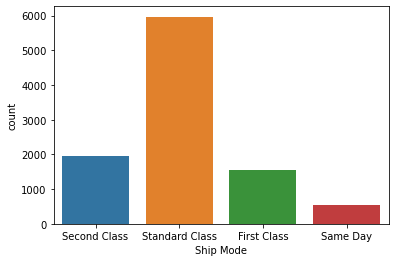

In [15]:
sns.countplot('Ship Mode',data=data)

<b>Following can be concluded from the above observation:</b>
<ol>
    <li>About 60% of the people take standard class as a shipment</li>
    <li>About 20% of the people take Second class as a shipment</li>
    <li>About 15% of the people take First class as a shipment</li>
    <li>About 5% of the people take Same day as a shipment</li>
</ol>

### analysing segment

In [16]:
(data['Segment'].value_counts()/len(data['Segment'])*100)

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='count'>

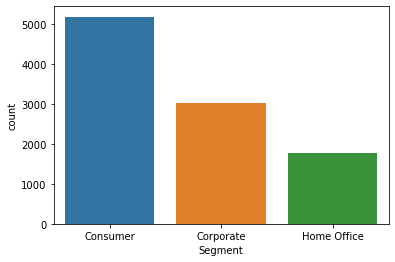

In [17]:
sns.countplot('Segment',data=data)

<b>Following can be concluded from the above observation:</b>
<ol>
    <li>About 50% of the people belong to the consumer class</li>
    <li>About 30% people belong to the corporate class</li>
    <li>About 20% people belong to the home office class</li>
</ol>

### analysing region 

In [18]:
(data['Region'].value_counts()/len(data['Region']))*100

West       32.049230
East       28.497098
Central    23.243946
South      16.209726
Name: Region, dtype: float64

<AxesSubplot:xlabel='Region', ylabel='count'>

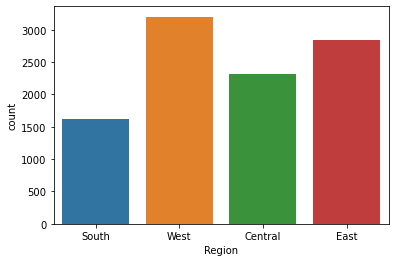

In [19]:
sns.countplot('Region',data=data)

<b>Following can be concluded from the above observation:</b>
<ol>
    <li>About 30% of the consumer are from West region</li>
    <li>About 28% of the consumer are from East region</li>
    <li>About 23% of the consumer are from Central region</li>
    <li>About 16% of the consumer are from South region</li>
</ol>

### analysing Category

In [20]:
data['Category'].value_counts()/len(data['Category'])*100

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='count'>

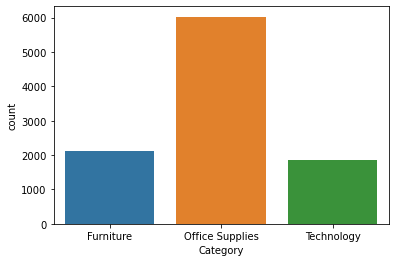

In [21]:
sns.countplot('Category',data=data)

<b>Following can be concluded from the above observation:</b>
<ol>
    <li>About 60% of the super market product are office supply</li>
    <li>About 21% of the super market product are Furniture supply</li>
    <li>About 18% of the super market product are Technology related</li>
</ol>

### analysing sub-category

In [22]:
data['Sub-Category'].value_counts()/len(data['Sub-Category'])*100

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

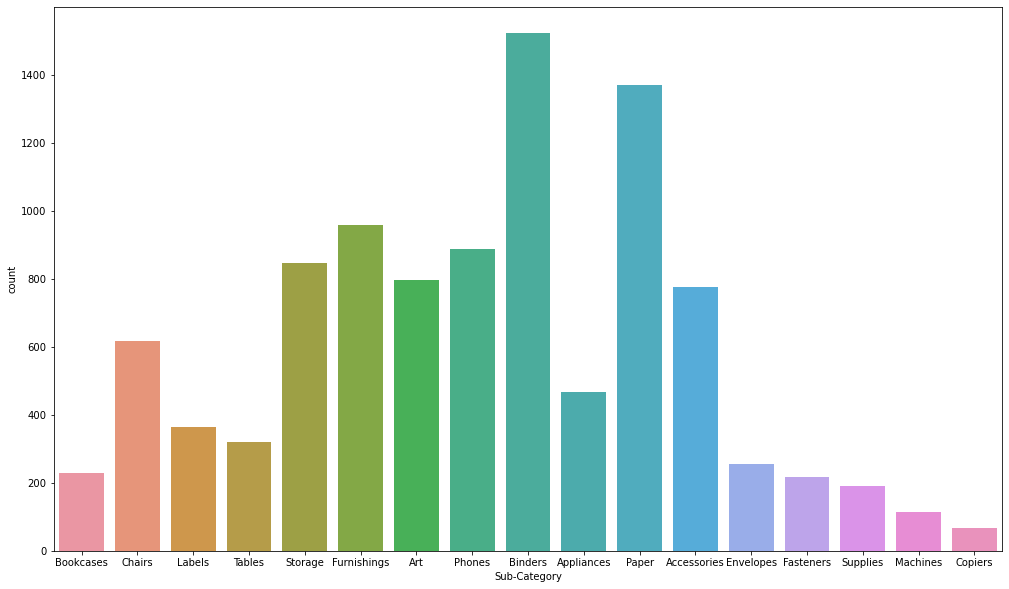

In [23]:
plt.figure(figsize=(17,10))
sns.countplot('Sub-Category',data=data)

Most of the sub-category falls under office supplies.

In [24]:
data.pivot_table(values='Sales',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [25]:
data.pivot_table(values='Profit',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


<b>From the above pivot table we can conclude:</b>
<ol>
    <li>For discount more than 20% the supermarket is going on loss</li>
    <li>For discount below 20% the supermarket is going on profit</li>
</ol>

### analysing profit

In [26]:
data['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

<b>From above we can conclude that there exist large number of outliers</b>
<br> *for confirming this we will see the boxplot

<b>The box plot is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers.</b>
<br><br>
<b>The skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Median and Mode are equal. The normal distribution has a skewness of 0.

Skewness tells us about the distribution of our data.</b>

<AxesSubplot:>

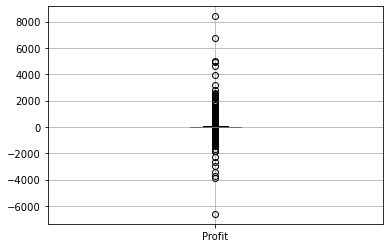

In [27]:
data.boxplot(column=['Profit'])

In [28]:
print(data['Profit'].skew())

7.561431562468343


<b>The skewness of 7.5 shows that the variable profit has a right-skewed distribution, indicating the presence of extreme values.</b>
<br><b>Max Profit proves the point</b>
<ul>
<li>We will cap our outliers to 10th and 90th percentile</li>
</ul>

In [29]:
print(data['Profit'].quantile(0.10))
print(data['Profit'].quantile(0.90))

-15.47346
89.28162000000006


In [30]:
data['Profit'] = np.where(data['Profit']<-15.47346, -15.47346, data['Profit'])
data['Profit'] = np.where(data['Profit']>89.28162, 89.28162, data['Profit'])
print(data['Profit'].skew())

1.1785401791509946


In [31]:
data['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

<b>From above we can conclude that there exist large number of outliers</b>
<br> *for confirming this we will see the boxplot

<AxesSubplot:>

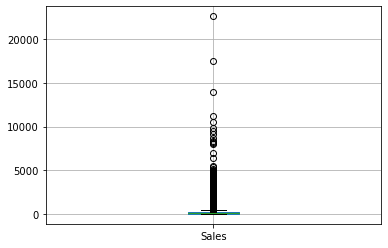

In [32]:
data.boxplot(column=['Sales'])

<b>In the above output, the circles indicate the outliers, and there are many.</b>

In [33]:
print(data['Sales'].skew())

12.97275234181623


<b>The skewness of 12.9 shows that the variable profit has a right-skewed distribution, indicating the presence of extreme values.</b>
<br><b>Max Sales proves the point</b>
<ul>
<li>We will cap our outliers to 10th and 90th percentile</li>
</ul>

In [34]:
print(data['Sales'].quantile(0.10))
print(data['Sales'].quantile(0.90))

7.8972
572.7060000000001


In [35]:
data['Sales'] = np.where(data['Sales']<7.8972, 7.8972, data['Sales'])
data['Sales'] = np.where(data['Sales']>572.7060, 572.7060, data['Sales'])
print(data['Sales'].skew())

1.3590859460548397


In [36]:
data['Sales'].describe()

count    9994.000000
mean      148.594065
std       186.172849
min         7.897200
25%        17.280000
50%        54.490000
75%       209.940000
max       572.706000
Name: Sales, dtype: float64

Now there is no outliers

<b>Heatmaps are used for the correlation matrics</b>

<AxesSubplot:>

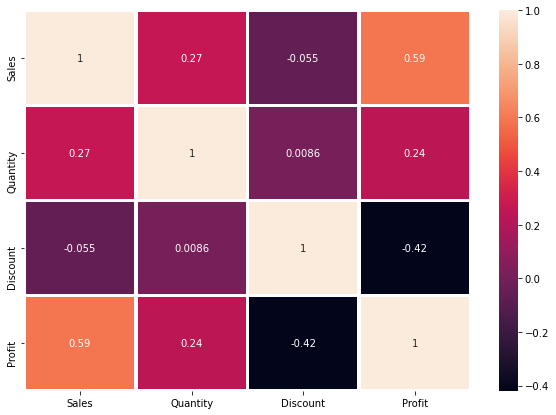

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot=True, xticklabels='auto',yticklabels='auto',linewidth=2.5)

<b>From the above heatmap we can conclude:</b>
<ol>
    <li>There is a positive Correlation between Sales and Profit ie Profit increses with Sales</li>
    <li>There is a positive Correlation between. ie Quantity increase with increase in Profit</li>
    <li>There is a negative Correlation between ie Profit decreases with increases in Discount</li>
    <li>There is a negative Correlation between Sales and Discount. ie Discount decreases with the increase in Sales</li>
    <li>Nearly no correlation between Quantity and discount</li>
</ol>

## Profit associated with segment

array([<AxesSubplot:title={'center':'Profit'}, xlabel='Segment'>],
      dtype=object)

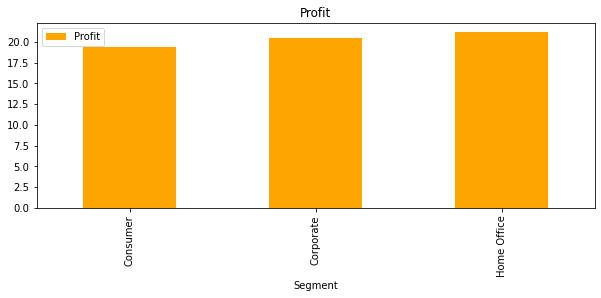

In [38]:
a = pd.pivot_table(data,index='Segment',values='Profit')
a.plot(kind='bar',subplots=True,figsize=(10,3.4),color='orange')

<b>Home Office give the most profit</b>

## Profit associated with Sub-Categories

array([<AxesSubplot:title={'center':'Profit'}, xlabel='Sub-Category'>],
      dtype=object)

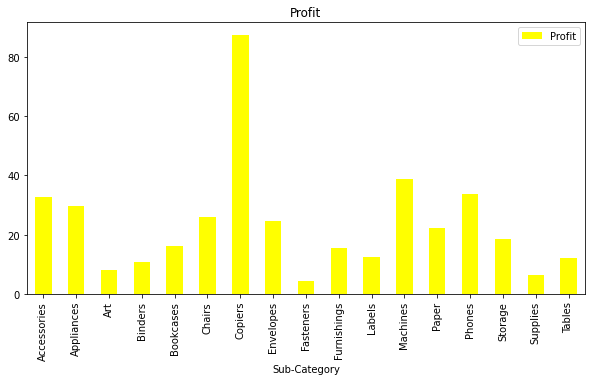

In [39]:
b= pd.pivot_table(data,index='Sub-Category',values='Profit')
b.plot(kind='bar',subplots=True,figsize=(10,5),color='yellow')

<b>Copiers give most profit</b>

## Sales in association with States 

<AxesSubplot:xlabel='State'>

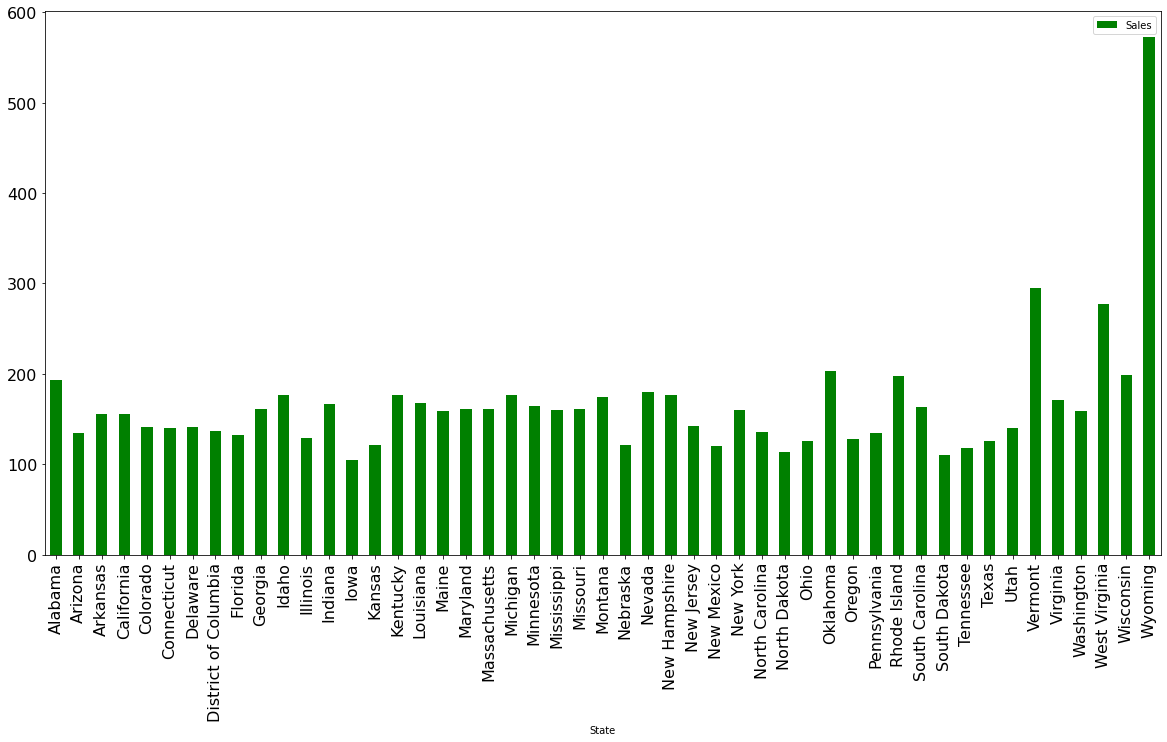

In [40]:
c = pd.pivot_table(data,index='State',values='Sales')
c.plot(kind='bar',color='green',figsize=(20,10),fontsize=16)

<b>Maximum sales in Wyoming</b>

## Segment and Region Columns

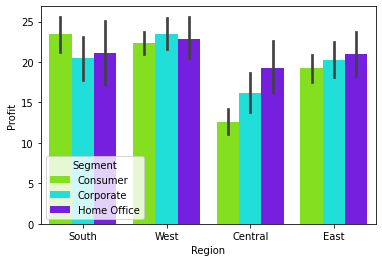

In [41]:
sns.barplot(data = data , x='Region',y='Profit',hue='Segment',palette='hsv')
plt.show()

<b>Central Region has less number of consumers</b>

## Profit associated with different categories

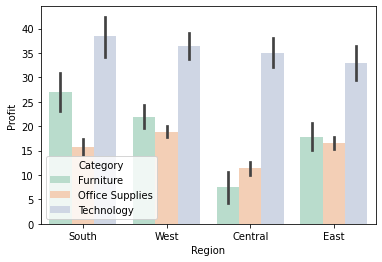

In [42]:
sns.barplot(data = data, x='Region', y='Profit',hue='Category',palette='Pastel2')
plt.show()

<b>Following can be concluded:<b>
<ol>
<li>sale of furniture is low in central and eastern regions</li>
    <li>There is very low office supply in Central Region</li>
<ol>

## Lineplots

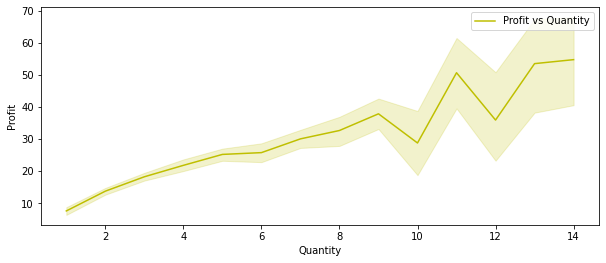

In [43]:
plt.figure(figsize=(10,4))
sns.lineplot('Quantity','Profit',data= data,color='y',label='Profit vs Quantity')
plt.legend()

<b>increase in Profit with increase in Quantity</b>

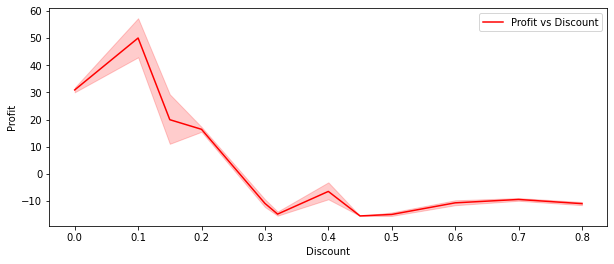

In [44]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount','Profit',data=data,color='r',label='Profit vs Discount')
plt.legend()

## Conclusion

<ol>
    <li>Supermarkets incures loss by giving discount</li>
    <li>Discount with more than 20% incures losses</li>
    <li>But by giving discounts the company gains long term customers</li>
    <li>The small losses from discounts are an essential part of the company business</li>
    <ol>

## Dashboard

In [45]:
mc = pw.Pywedge_Charts(data,c=None,y='Profit')
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')